In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving df (1).csv to df (1).csv


In [3]:
import pandas as pd


In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_absolute_error

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
from sklearn.metrics import classification_report

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
import pickle

In [14]:
df=pd.read_csv('df (1).csv')

In [15]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


In [17]:
df['Salary Estimate']

,Salary Estimate
0,$111K-$181K (Glassdoor est.)
1,$111K-$181K (Glassdoor est.)
2,$111K-$181K (Glassdoor est.)
3,$111K-$181K (Glassdoor est.)
4,$111K-$181K (Glassdoor est.)
...,...
5887,$42K - $76K (Glassdoor est.)
5888,-1
5889,-1
5890,-1


In [18]:
#Data Cleaning

In [19]:
df=df[df['Salary Estimate']!='-1']#Remove instance without salary estimate

In [20]:
#Remove per hour salary
df=df[~df['Salary Estimate'].str.contains('Per Hour')]

In [21]:
#Remove $
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('$',''))

<ipython-input-21-190a2140521f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('$',''))


In [22]:
#Remove K
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('K',''))

<ipython-input-22-50ad94d864d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('K',''))


In [23]:
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('-',' '))

<ipython-input-23-29b4108ebc59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.replace('-',' '))


In [24]:
df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.split())#split it

<ipython-input-24-6f694b7f06c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate']=df['Salary Estimate'].apply(lambda x:x.split())#split it


In [25]:
df['Salary Estimate']

,Salary Estimate
0,"[111, 181, (Glassdoor, est.)]"
1,"[111, 181, (Glassdoor, est.)]"
2,"[111, 181, (Glassdoor, est.)]"
3,"[111, 181, (Glassdoor, est.)]"
4,"[111, 181, (Glassdoor, est.)]"
...,...
5881,"[38, 64, (Glassdoor, est.)]"
5882,"[47, 89, (Glassdoor, est.)]"
5883,"[66, 113, (Glassdoor, est.)]"
5886,"[67, 111, (Glassdoor, est.)]"


In [26]:
df['Min_salary']=df['Salary Estimate'].apply(lambda x: x[0])

<ipython-input-26-8d5a5c811c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Min_salary']=df['Salary Estimate'].apply(lambda x: x[0])


In [27]:
df['Min_salary']

,Min_salary
0,111
1,111
2,111
3,111
4,111
...,...
5881,38
5882,47
5883,66
5886,67


In [28]:
df['Max_salary']=df['Salary Estimate'].apply(lambda x: x[1])

<ipython-input-28-d40a22da279d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max_salary']=df['Salary Estimate'].apply(lambda x: x[1])


In [29]:
df['Max_salary']

,Max_salary
0,181
1,181
2,181
3,181
4,181
...,...
5881,64
5882,89
5883,113
5886,111


In [30]:
# cast Min_salary and Max_salary to int and get the average salary
df['Min_salary']=df['Min_salary'].apply(lambda x:int(x))

In [31]:
df['Max_salary']

,Max_salary
0,181
1,181
2,181
3,181
4,181
...,...
5881,64
5882,89
5883,113
5886,111


In [32]:
df['Min_salary']

,Min_salary
0,111
1,111
2,111
3,111
4,111
...,...
5881,38
5882,47
5883,66
5886,67


In [33]:
import re


df['Max_salary'] = df['Max_salary'].apply(lambda x: re.sub('[^0-9]', '', x))

# Convert to integer
df['Max_salary'] = df['Max_salary'].astype(int)

In [34]:
df['Max_salary']

,Max_salary
0,181
1,181
2,181
3,181
4,181
...,...
5881,64
5882,89
5883,113
5886,111


In [35]:
df['Average_salary']=(df.Min_salary+df.Max_salary)/2

In [36]:
df['Location']

,Location
0,"New York, NY"
1,"New York, NY"
2,"New York, NY"
3,"Lyndhurst, NJ"
4,"New York, NY"
...,...
5881,"Columbus, OH"
5882,"Cincinnati, OH"
5883,"Cincinnati, OH"
5886,"Cincinnati, OH"


In [37]:
#states,what states is the job in?
df['State']=df['Location'].apply(lambda x: x.split()[-1])

In [38]:
df=df[df.State!= 'Kingdom']#Remove Kingdom

In [39]:
df['Job Title']

,Job Title
0,Senior Data Scientist
1,"Data Scientist, Product Analytics"
2,Data Science Manager
3,Data Analyst
4,"Director, Data Science"
...,...
5881,Information Scientist
5882,Supervisory Research Health Scientist
5883,Senior SAS Programmer (Scientist)
5886,Senior Data Analyst - Product Analytics (open ...


In [40]:
def title_organizer(x): #organize the job title
    x = x.lower()
    if 'data scientist' in x or 'data science' in x:
        return 'data scientist'
    elif 'data engineer' in x:
        return 'data engineer'
    elif 'deep learning' in x:
        return 'deep learning engineer'
    elif 'machine learning' in x:
        return 'machine learning engineer'
    elif 'director' in x:
        return 'director'
    elif 'manager' in x:
        return 'manager'
    elif 'analyst' in x:
        return 'analyst'
    elif 'researcher' in x:
        return 'researcher'
    else:
        return 'other'

In [41]:
df['Job Title']=df['Job Title'].apply(title_organizer)

<ipython-input-41-fc4ef3c4dc00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title']=df['Job Title'].apply(title_organizer)


In [42]:
df=df[df['Rating']!=-1]

In [43]:
cleaned_df = df[['Average_salary', 'Job Title', 'Rating', 'State']]

In [44]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Average_salary  4891 non-null   float64
 1   Job Title       4891 non-null   object 
 2   Rating          4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


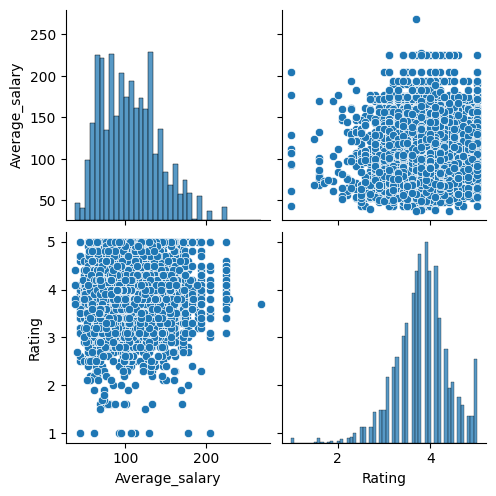

In [45]:
#Explatory Data Analysis(EDA)
sns.pairplot(cleaned_df)

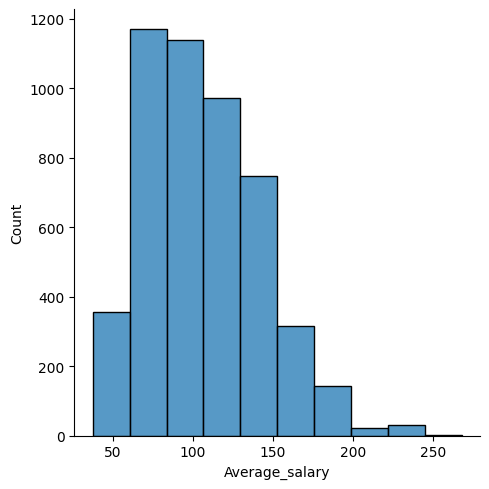

In [46]:
sns.displot(x='Average_salary',data=cleaned_df,bins=10)

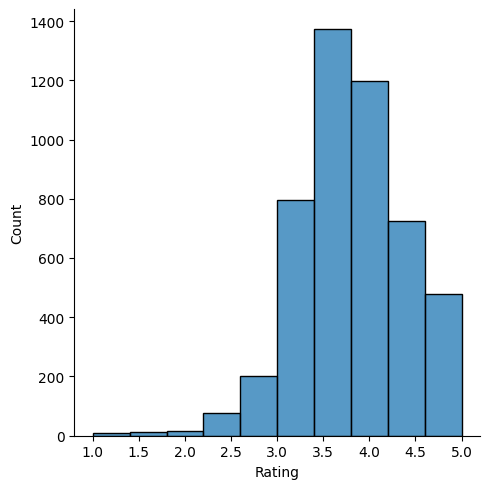

In [47]:
sns.displot(x='Rating',data=cleaned_df,bins=10)

<Axes: xlabel='Rating', ylabel='Average_salary'>

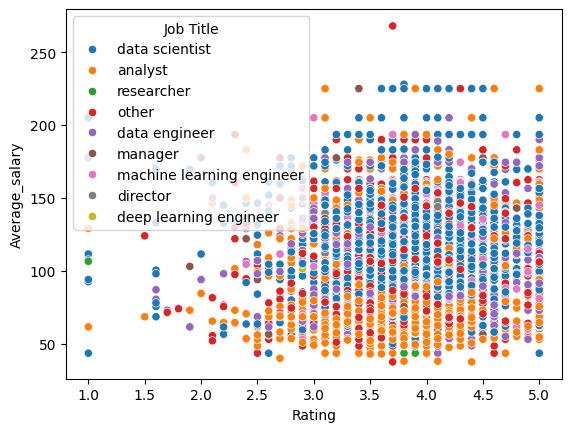

In [48]:
sns.scatterplot(x='Rating', y='Average_salary', data=cleaned_df, hue= 'Job Title')

In [49]:
#Featured engineering
preprocessed_df=pd.get_dummies(cleaned_df,columns=['State','Job Title'],dtype=int)

In [50]:
x=preprocessed_df.drop(columns='Average_salary')

In [51]:
y=preprocessed_df['Average_salary']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=101)

In [53]:
lr=LinearRegression()

In [54]:
lr.fit(x_train,y_train)#fti the model

LinearRegression()

In [55]:
#Predict
predictions=lr.predict(x_test)

In [56]:
predictions

array([ 93.125    , 124.078125 ,  90.9921875,  74.8828125,  99.78125  ,
       121.8984375,  90.9921875,  84.109375 , 106.7421875, 129.8203125,
        77.4375   , 139.4296875,  97.6640625,  87.7109375,  97.6640625,
        97.3125   ,  97.015625 , 136.96875  ,  94.1796875, 109.421875 ,
       139.25     ,  87.1484375, 122.609375 , 121.5703125,  88.859375 ,
        75.078125 ,  93.53125  , 107.546875 ,  90.546875 , 125.859375 ,
        96.609375 , 121.5390625,  87.96875  ,  98.1953125,  85.5546875,
       123.546875 ,  98.90625  , 112.4296875,  90.265625 , 114.2109375,
       123.2265625, 121.8984375, 106.3828125,  88.78125  ,  77.984375 ,
       125.328125 ,  94.8046875, 125.1484375,  99.890625 , 116.3671875,
       149.8125   , 103.4296875, 137.6796875,  88.421875 , 106.921875 ,
        89.5703125, 138.5390625,  99.265625 ,  97.5      , 106.65625  ,
       129.640625 , 137.890625 ,  90.1015625, 121.0078125,  98.2890625,
        76.1328125,  79.9921875, 113.4921875, 116.71875  ,  75.7

<Axes: xlabel='Average_salary'>

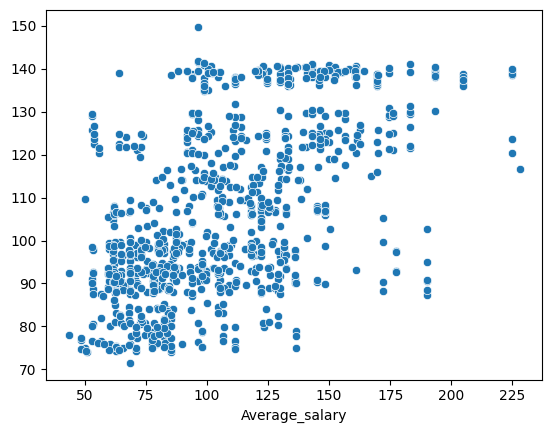

In [57]:
sns.scatterplot(x=y_test, y=predictions)

In [58]:
print('MAE:',mean_absolute_error(y_test,predictions))

MAE: 23.45115391981614


In [59]:
pickle.dump(lr, open('Salary_Estimate.PKL', 'wb'))

In [60]:
preprocessed_df

,Average_salary,Rating,State_AZ,State_CA,State_DC,State_DE,State_FL,State_GA,State_IL,State_IN,...,State_WI,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,Job Title_researcher
0,146.0,3.5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,146.0,4.5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,146.0,3.4,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,146.0,3.4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,146.0,2.9,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,51.0,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5882,68.0,4.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5883,89.5,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5886,89.0,4.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
preprocessed_df['Average_salary'].median()

102.0

In [62]:
def sat(x):
  if x>=102:
    return(1)
  else:
   return(0)


In [63]:
preprocessed_df['satisfaction']=preprocessed_df['Average_salary'].apply(sat)

In [64]:
preprocessed_df['satisfaction']

,satisfaction
0,1
1,1
3,1
4,1
5,1
...,...
5881,0
5882,0
5883,0
5886,0


In [65]:
x = preprocessed_df.drop(columns=['satisfaction', 'Average_salary'])

In [66]:
y=preprocessed_df['satisfaction']

In [67]:
#Modeling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [68]:
logreg=LogisticRegression()

In [69]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
prediction=logreg.predict(x_test)

In [71]:
prediction

array([0, 1, 0, ..., 0, 1, 0])

In [72]:
#evaluating
confusion_matrix(y_test,prediction)



array([[518, 204],
       [230, 516]])

In [73]:
len(y_test)

1468

In [74]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       722
           1       0.72      0.69      0.70       746

    accuracy                           0.70      1468
   macro avg       0.70      0.70      0.70      1468
weighted avg       0.70      0.70      0.70      1468



In [75]:
accuracy_score(y_test,prediction)

0.7043596730245232

In [76]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn=KNeighborsClassifier()

In [78]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
prediction_knn=knn.predict(x_test)

In [80]:
prediction_knn

array([1, 1, 1, ..., 0, 1, 1])

In [81]:
y_test

,satisfaction
4607,0
3136,1
2694,0
4633,0
4490,1
...,...
5366,0
2080,0
3348,0
1996,0


In [82]:
confusion_matrix(y_test,prediction_knn)

array([[459, 263],
       [251, 495]])

In [83]:
accuracy_score(y_test,prediction_knn)

0.6498637602179836

In [84]:
print(classification_report(y_test,prediction_knn))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       722
           1       0.65      0.66      0.66       746

    accuracy                           0.65      1468
   macro avg       0.65      0.65      0.65      1468
weighted avg       0.65      0.65      0.65      1468



In [85]:
#Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

In [86]:
tree=DecisionTreeClassifier()

In [87]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
predict_tree=tree.predict(x_test)

In [89]:
predict_tree

array([0, 0, 1, ..., 0, 1, 0])

In [90]:
y_test

,satisfaction
4607,0
3136,1
2694,0
4633,0
4490,1
...,...
5366,0
2080,0
3348,0
1996,0


In [91]:
confusion_matrix(y_test,predict_tree)

array([[507, 215],
       [280, 466]])

In [92]:
accuracy_score(y_test,predict_tree)

0.6628065395095368

In [93]:
print(classification_report(y_test,predict_tree))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       722
           1       0.68      0.62      0.65       746

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468



In [94]:
#rainforest
from sklearn.ensemble import RandomForestClassifier

In [95]:
rf=RandomForestClassifier()

In [96]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
predict_rf=rf.predict(x_test)

In [98]:
predict_rf

array([0, 0, 1, ..., 0, 1, 0])

In [99]:
y_test

,satisfaction
4607,0
3136,1
2694,0
4633,0
4490,1
...,...
5366,0
2080,0
3348,0
1996,0


In [100]:
confusion_matrix(y_test,predict_rf)

array([[466, 256],
       [248, 498]])

In [101]:
accuracy_score(y_test,predict_rf)

0.6566757493188011

In [102]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       722
           1       0.66      0.67      0.66       746

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468

